___
### Notebook 3 - Machine Learning Models
___

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from io import BytesIO
import matplotlib.pyplot as plt
# Clearing up memory
import gc

# Featuretools for automated feature engineering
import featuretools as ft
ft.__version__

'0.2.1'

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
df_kaggle = pd.read_csv('Cleaned_Application_Data.csv')
print(df_kaggle.shape)
desc = df_kaggle.describe(include='all').T
desc['percent_missing'] = (df_kaggle['TARGET'].size - desc['count'])*100/df_kaggle['TARGET'].size
desc = desc[desc['count']<df_kaggle['TARGET'].size][['count','percent_missing']]
print("Cleaned_Application_Data has {} columns with missing data out of total {} columns".format(desc.shape[0], 
      df_kaggle.columns.size))
df_kaggle.head()

(356255, 127)
Cleaned_Application_Data has 0 columns with missing data out of total 127 columns


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,FLAG_EXT_SOURCE_1,FLAG_EXT_SOURCE_2,FLAG_EXT_SOURCE_3,FLAG_SOCIAL_CIRCLE_AVAILABLE,FLAG_CREDIT_BUREAU_CHECK
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,-1.0,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Y,Y,Y,Y,Y
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,-1.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,0.000000,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Y,Y,N,Y,Y
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.000000,0.

Above output suggests that there is no missing data in the df_kaggle dataset.

In [4]:
feature_matrix = pd.read_csv('feature_matrix_new.csv')
print(feature_matrix.shape)
feature_matrix.head()

/home/hnsanadhya_08/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (866,1148,1222,1356,1594) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(356255, 1788)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,SUM(bureau.DAYS_CREDIT),SUM(bureau.CREDIT_DAY_OVERDUE),SUM(bureau.DAYS_CREDIT_ENDDATE),SUM(bureau.DAYS_ENDDATE_FACT),SUM(bureau.AMT_CREDIT_MAX_OVERDUE),SUM(bureau.CNT_CREDIT_PROLONG),SUM(bureau.AMT_CREDIT_SUM),SUM(bureau.AMT_CREDIT_SUM_DEBT),SUM(bureau.AMT_CREDIT_SUM_LIMIT),SUM(bureau.AMT_CREDIT_SUM_OVERDUE),SUM(bureau.DAYS_CREDIT_UPDATE),SUM(bureau.AMT_ANNUITY_bureau),SUM(bureau.0),SUM(bureau.1),SUM(bureau.2),SUM(bureau.3),SUM(bureau.4),SUM(bureau.5),SUM(bureau.C),SUM(bureau.X),SUM(bureau.AGE),SUM(bureau.BUREAU_BAL_AVAILABLE),SUM(bureau.CREDIT_ACTIVE_Active),SUM(bureau.CREDIT_ACTIVE_Bad debt),SUM(bureau.CREDIT_ACTIVE_Closed),SUM(bureau.CREDIT_ACTIVE_Sold),SUM(bureau.CREDIT_CURRENCY_currency 1),SUM(bureau.CREDIT_CURRENCY_currency 2),SUM(bureau.CREDIT_CURRENCY_currency 3),SUM(bureau.CREDIT_CURRENCY_currency 4),SUM(bureau.CREDIT_TYPE_Another type of loan),SUM(bureau.CREDIT_TYPE_Car loan),SUM(bureau.CREDIT_TYPE_Cash loan (non-earmarked)),SUM(bureau.CREDIT_TYPE_Consumer credit),SUM(bureau.CREDIT_TYPE_Credit card),SUM(bureau.CREDIT_TYPE_Interbank credit),SUM(bureau.CREDIT_TYPE_Loan for business development),SUM(bureau.CREDIT_TYPE_Loan for purchase of shares (margin lending)),SUM(bureau.CREDIT_TYPE_Loan for the purchase of equipment),SUM(bureau.CREDIT_TYPE_Loan for working capital replenishment),SUM(bureau.CREDIT_TYPE_Microloan),SUM(bureau.CREDIT_TYPE_Mobile operator loan),SUM(bureau.CREDIT_TYPE_Mortgage),SUM(bureau.CREDIT_TYPE_Real estate loan),SUM(bureau.CREDIT_TYPE_Unknown type of loan),MAX(bureau.DAYS_CREDIT),MAX(bureau.CREDIT_DAY_OVERDUE),MAX(bureau.DAYS_CREDIT_ENDDATE),MAX(bureau.DAYS_ENDDATE_FACT),MAX(bureau.AMT_CREDIT_MAX_OVERDUE),MAX(bureau.CNT_CREDIT_PROLONG),MAX(bureau.AMT_CREDIT_SUM),MAX(bureau.AMT_CREDIT_SUM_DEBT),MAX(bureau.AMT_CREDIT_SUM_LIMIT),MAX(bureau.AMT

In [5]:
# Check if there is any non-finite value in the application (df_kaggle) dataset
df_kaggle[df_kaggle.isin([np.inf, -np.inf]).any(1)].shape[0]

0

In [6]:
# Check if there is any non-finite value in the deep feature synthesized (feature_matrix) dataset
feature_matrix[feature_matrix.isin([np.inf, -np.inf]).any(1)].shape[0]

230

In [7]:
# Check if there is any non-finite value in the dataset
desc = feature_matrix.describe(include='all').T[['count','max']]
desc[desc.isin([np.inf, -np.inf]).any(1)]

,count,max
MAX(credit_app.percent_credit_used),92447,inf
MEAN(credit_app.percent_credit_used),92447,inf
MAX(prev_app.MEAN(credit_app.percent_credit_used)),92447,inf
MEAN(prev_app.MAX(credit_app.percent_credit_used)),92447,inf
MEAN(prev_app.MEAN(credit_app.percent_credit_used)),92447,inf


In the credit_app file, percent_credit_used field was added manually. 

<b>Formula used:Compute percent of credit used</b><br>
df_credit_onehot['percent_credit_used'] = np.round((df_credit_onehot.AMT_BALANCE/\
        df_credit_onehot.AMT_CREDIT_LIMIT_ACTUAL)*100, 2)
The values were infinite in the case when AMT_CREDIT_LIMIT_ACTUAL=0 and AMT_BALANCE>0

So in the case when the value is inf, we replaced it to zero for the fields percent_credit_used

In [8]:
feature_matrix.replace(to_replace=np.inf, value=0.0, inplace=True)

In [9]:
# recheck if there is any non-finite value in the dataset
desc = feature_matrix.describe(include='all').T[['count','max']]
desc[desc.isin([np.inf, -np.inf]).any(1)]

,count,max


In [10]:
cols_df_kaggle = df_kaggle.columns
cols_df_kaggle = cols_df_kaggle.drop('SK_ID_CURR')
cols_feature_matrix = feature_matrix.columns
cols_common = list(set(cols_df_kaggle).intersection(cols_feature_matrix))

# Remove the columns from feature_matrix dataset that are present in both the datasets 
feature_matrix.drop(cols_common, axis=1, inplace=True)

In [11]:
feature_matrix.head()

,SK_ID_CURR,SUM(bureau.DAYS_CREDIT),SUM(bureau.CREDIT_DAY_OVERDUE),SUM(bureau.DAYS_CREDIT_ENDDATE),SUM(bureau.DAYS_ENDDATE_FACT),SUM(bureau.AMT_CREDIT_MAX_OVERDUE),SUM(bureau.CNT_CREDIT_PROLONG),SUM(bureau.AMT_CREDIT_SUM),SUM(bureau.AMT_CREDIT_SUM_DEBT),SUM(bureau.AMT_CREDIT_SUM_LIMIT),SUM(bureau.AMT_CREDIT_SUM_OVERDUE),SUM(bureau.DAYS_CREDIT_UPDATE),SUM(bureau.AMT_ANNUITY_bureau),SUM(bureau.0),SUM(bureau.1),SUM(bureau.2),SUM(bureau.3),SUM(bureau.4),SUM(bureau.5),SUM(bureau.C),SUM(bureau.X),SUM(bureau.AGE),SUM(bureau.BUREAU_BAL_AVAILABLE),SUM(bureau.CREDIT_ACTIVE_Active),SUM(bureau.CREDIT_ACTIVE_Bad debt),SUM(bureau.CREDIT_ACTIVE_Closed),SUM(bureau.CREDIT_ACTIVE_Sold),SUM(bureau.CREDIT_CURRENCY_currency 1),SUM(bureau.CREDIT_CURRENCY_currency 2),SUM(bureau.CREDIT_CURRENCY_currency 3),SUM(bureau.CREDIT_CURRENCY_currency 4),SUM(bureau.CREDIT_TYPE_Another type of loan),SUM(bureau.CREDIT_TYPE_Car loan),SUM(bureau.CREDIT_TYPE_Cash loan (non-earmarked)),SUM(bureau.CREDIT_TYPE_Consumer credit),SUM(bureau.CREDIT_TYPE_Credit card),SUM(bureau.CREDIT_TYPE_Interbank credit),SUM(bureau.CREDIT_TYPE_Loan for business development),SUM(bureau.CREDIT_TYPE_Loan for purchase of shares (margin lending)),SUM(bureau.CREDIT_TYPE_Loan for the purchase of equipment),SUM(bureau.CREDIT_TYPE_Loan for working capital replenishment),SUM(bureau.CREDIT_TYPE_Microloan),SUM(bureau.CREDIT_TYPE_Mobile operator loan),SUM(bureau.CREDIT_TYPE_Mortgage),SUM(bureau.CREDIT_TYPE_Real estate loan),SUM(bureau.CREDIT_TYPE_Unknown type of loan),MAX(bureau.DAYS_CREDIT),MAX(bureau.CREDIT_DAY_OVERDUE),MAX(bureau.DAYS_CREDIT_ENDDATE),MAX(bureau.DAYS_ENDDATE_FACT),MAX(bureau.AMT_CREDIT_MAX_OVERDUE),MAX(bureau.CNT_CREDIT_PROLONG),MAX(bureau.AMT_CREDIT_SUM),MAX(bureau.AMT_CREDIT_SUM_DEBT),MAX(bureau.AMT_CREDIT_SUM_LIMIT),MAX(bureau.AMT_CREDIT_SUM_OVERDUE),MAX(bureau.DAYS_CREDIT_UPDATE),MAX(bureau.AMT_ANNUITY_bureau),MAX(bureau.0),MAX(bureau.1),MAX(bureau.2),MAX(bureau.3),MAX(bureau.4),MAX(bureau.5),MAX(bureau.C),MAX(bureau.X),MAX(bureau.AGE),MAX(bureau.BUREAU_BAL_AVAILABLE),MAX(bureau.CREDIT_ACTIVE_Active),MAX(bureau.CREDIT_ACTIVE_Bad debt),MAX(bureau.CREDIT_ACTIVE_Closed),MAX(bureau.CREDIT_ACTIVE_Sold),MAX(bureau.CREDIT_CURRENCY_currency 1),MAX(bureau.CREDIT_CURRENCY_currency 2),MAX(bureau.CREDIT_CURRENCY_currency 3),MAX(bureau.CREDIT_CURRENCY_currency 4),MAX(bureau.CREDIT_TYPE_Another type of loan),MAX(bureau.CREDIT_TYPE_Car loan),MAX(bureau.CREDIT_TYPE_Cash loan (non-earmarked)),MAX(bureau.CREDIT_TYPE_Consumer credit),MAX(bureau.CREDIT_TYPE_Credit card),MAX(bureau.CREDIT_TYPE_Interbank credit),MAX(bureau.CREDIT_TYPE_Loan for business development),MAX(bureau.CREDIT_TYPE_Loan for purchase of shares (margin lending)),MAX(bureau.CREDIT_TYPE_Loan for the purchase of equipment),MAX(bureau.CREDIT_TYPE_Loan for working capital replenishment),MAX(bureau.CREDIT_TYPE_Microloan),MAX(bureau.CREDIT_TYPE_Mobile operator loan),MAX(bureau.CREDIT_TYPE_Mortgage),MAX(bureau.CREDIT_TYPE_Real estate loan),MAX(bureau.CREDIT_TYPE_Unknown type of loan),MEAN(bureau.DAYS_CREDIT),MEAN(bureau.CREDIT_DAY_OVERDUE),MEAN(bureau.DAYS_CREDIT_ENDDATE),MEAN(bureau.DAYS_ENDDATE_FACT),MEAN(bureau.AMT_CREDIT_MAX_OVERDUE),MEAN(bureau.CNT_CREDIT_PROLONG),MEAN(bureau.AMT_CREDIT_SUM),MEAN(bureau.AMT_CREDIT_SUM_DEBT),MEAN(bureau.AMT_CREDIT_SUM_LIMIT),MEAN(bureau.AMT_CREDIT_SUM_OVERDUE),MEAN(bureau.DAYS_CREDIT_UPDATE),MEAN(bureau.AMT_ANNUITY_bureau),MEAN(bureau.0),MEAN(bureau.1),MEAN(bureau.2),MEAN(bureau.3),MEAN(bureau.4),MEAN(bureau.5),MEAN(bureau.C),MEAN(bureau.X),MEAN(bureau.AGE),MEAN(bureau.BUREAU_BAL_AVAILABLE),MEAN(bureau.CREDIT_ACTIVE_Active),MEAN(bureau.CREDIT_ACTIVE_Bad debt),MEAN(bureau.CREDIT_ACTIVE_Closed),MEAN(bureau.CREDIT_ACTIVE_Sold),MEAN(bureau.CREDIT_CURRENCY_currency 1),MEAN(bureau.CREDIT_CURRENCY_currency 2),MEAN(bureau.CREDIT_CURRENCY_currency 3),MEAN(bureau.CREDIT_CURRENCY_currency 4),MEAN(bureau.CREDIT_TYPE_Another type of loan),MEAN(bureau.CREDIT_TYPE_Car loan),MEAN(bureau.CREDIT_TYPE_Cash loan (non-

In [12]:
feature_matrix.columns

Index(['SK_ID_CURR', 'SUM(bureau.DAYS_CREDIT)',
       'SUM(bureau.CREDIT_DAY_OVERDUE)', 'SUM(bureau.DAYS_CREDIT_ENDDATE)',
       'SUM(bureau.DAYS_ENDDATE_FACT)', 'SUM(bureau.AMT_CREDIT_MAX_OVERDUE)',
       'SUM(bureau.CNT_CREDIT_PROLONG)', 'SUM(bureau.AMT_CREDIT_SUM)',
       'SUM(bureau.AMT_CREDIT_SUM_DEBT)', 'SUM(bureau.AMT_CREDIT_SUM_LIMIT)',
       ...
       'MEAN(prev_app.MEAN(credit_app.AMT_TOTAL_RECEIVABLE_average))',
       'MEAN(prev_app.MEAN(credit_app.CNT_DRAWINGS_ATM_CURRENT_average))',
       'MEAN(prev_app.MEAN(credit_app.CNT_DRAWINGS_CURRENT_average))',
       'MEAN(prev_app.MEAN(credit_app.CNT_DRAWINGS_OTHER_CURRENT_average))',
       'MEAN(prev_app.MEAN(credit_app.CNT_DRAWINGS_POS_CURRENT_average))',
       'MEAN(prev_app.MEAN(credit_app.CNT_INSTALMENT_MATURE_CUM_average))',
       'MEAN(prev_app.MEAN(credit_app.SK_DPD_average))',
       'MEAN(prev_app.MEAN(credit_app.SK_DPD_DEF_average))',
       'MEAN(prev_app.MEAN(credit_app.SK_DPD_gt_0_rcd_count))',
       'MEA

In [13]:
# Merge the two dataset into a single dataset
df_kaggle = df_kaggle.merge(feature_matrix, on='SK_ID_CURR')
print(df_kaggle.shape)

(356255, 1793)


In [14]:
desc = df_kaggle.describe(include='all').T
desc['percent_missing'] = (df_kaggle['TARGET'].size - desc['count'])*100/df_kaggle['TARGET'].size
desc = desc[desc['count']<df_kaggle['TARGET'].size][['count','percent_missing']]
print("The combined dataset has {} columns with missing data out of total {} columns".format(desc.shape[0], 
      df_kaggle.columns.size))

The combined dataset has 1664 columns with missing data out of total 1793 columns


In [15]:
# Since the original df_kaggle dataset has no missing information and then when it was combined with the 
#   dataset obtained from deep feature synthesis process, some missing data was introduced.
# Since deep feature synthesis produced just max, min and mean data which means all the data is numeric
# Missing would mean that in the dataset using which the data was generated was not having data corresponding 
#   to the defined relationship between the application dataset and that file.
# So we can safely fill all the missing information in this dataset with zeros.
df_kaggle.fillna(0, inplace=True)

In [16]:
df_kaggle.dtypes[df_kaggle.dtypes=='object']

NAME_CONTRACT_TYPE                                    object
CODE_GENDER                                           object
FLAG_OWN_CAR                                          object
FLAG_OWN_REALTY                                       object
NAME_TYPE_SUITE                                       object
NAME_INCOME_TYPE                                      object
NAME_EDUCATION_TYPE                                   object
NAME_FAMILY_STATUS                                    object
NAME_HOUSING_TYPE                                     object
OCCUPATION_TYPE                                       object
WEEKDAY_APPR_PROCESS_START                            object
ORGANIZATION_TYPE                                     object
FONDKAPREMONT_MODE                                    object
HOUSETYPE_MODE                                        object
WALLSMATERIAL_MODE                                    object
EMERGENCYSTATE_MODE                                   object
FLAG_EXT_SOURCE_1       

In [17]:
# Some of the columns above were read as object but are float type. Change the datatype to correct datatype
cols = ['SUM(credit_app.percent_credit_used)', 'SUM(prev_app.MAX(credit_app.percent_credit_used))', 
        'SUM(prev_app.MEAN(credit_app.percent_credit_used))', 'MAX(prev_app.SUM(credit_app.percent_credit_used))', 
        'MEAN(prev_app.SUM(credit_app.percent_credit_used))']
df_kaggle[cols] = df_kaggle[cols].astype(float)

In [18]:
df_kaggle.dtypes[df_kaggle.dtypes=='object'] 

NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
OCCUPATION_TYPE                 object
WEEKDAY_APPR_PROCESS_START      object
ORGANIZATION_TYPE               object
FONDKAPREMONT_MODE              object
HOUSETYPE_MODE                  object
WALLSMATERIAL_MODE              object
EMERGENCYSTATE_MODE             object
FLAG_EXT_SOURCE_1               object
FLAG_EXT_SOURCE_2               object
FLAG_EXT_SOURCE_3               object
FLAG_SOCIAL_CIRCLE_AVAILABLE    object
FLAG_CREDIT_BUREAU_CHECK        object
dtype: object

In [19]:
# Perform one-hot encoding
df_kaggle_onehot = pd.get_dummies(df_kaggle)
print('Kaggle dataset shape before and after onehot', df_kaggle.shape, df_kaggle_onehot.shape)

Kaggle dataset shape before and after onehot (356255, 1793) (356255, 1925)


In [20]:
df_kaggle_onehot.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SUM(bureau.DAYS_CREDIT),SUM(bureau.CREDIT_DAY_OVERDUE),SUM(bureau.DAYS_CREDIT_ENDDATE),SUM(bureau.DAYS_ENDDATE_FACT),SUM(bureau.AMT_CREDIT_MAX_OVERDUE),SUM(bureau.CNT_CREDIT_PROLONG),SUM(bureau.AMT_CREDIT_SUM),SUM(bureau.AMT_CREDIT_SUM_DEBT),SUM(bureau.AMT_CREDIT_SUM_LIMIT),SUM(bureau.AMT_CREDIT_SUM_OVERDUE),SUM(bureau.DAYS_CREDIT_UPDATE),SUM(bureau.AMT_ANNUITY_bureau),SUM(bureau.0),SUM(bureau.1),SUM(bureau.2),SUM(bureau.3),SUM(bureau.4),SUM(bureau.5),SUM(bureau.C),SUM(bureau.X),SUM(bureau.AGE),SUM(bureau.BUREAU_BAL_AVAILABLE),SUM(bureau.CREDIT_ACTIVE_Active),SUM(bureau.CREDIT_ACTIVE_Bad debt),SUM(bureau.CREDIT_ACTIVE_Closed),SUM(bureau.CREDIT_ACTIVE_Sold),SUM(bureau.CREDIT_CURRENCY_currency 1),SUM(bureau.CREDIT_CURRENCY_currency 2),SUM(bureau.CREDIT_CURRENCY_currency 3),SUM(bureau.CREDIT_CURRENCY_currency 4),SUM(bureau.CREDIT_TYPE_Another type of loan),SUM(bureau.CREDIT_TYPE_Car loan),SUM(bureau.CREDIT_TYPE_Cash loan (non-earmarked)),SUM(bureau.CREDIT_TYPE_Consumer credit),SUM(bureau.CREDIT_TYPE_Credit card),SUM(bureau.CREDIT_TYPE_Interbank credit),SUM(bureau.CREDIT_TYPE_Loan for business development),SUM(bureau.CREDIT_TYPE_Loan for purchase of shares (margin lending)),SUM(bureau.CREDIT_TYPE_Loan for the purchase of equipment),SUM(bureau.CREDIT_TYPE_Loan for working capital replenishment),SUM(bureau.CREDIT_TYPE_Microloan),SUM(bureau.CREDIT_TYPE_Mobile operator loan),SUM(bureau.CREDIT_TYPE_Mortgage),SUM(bureau.CREDIT_TYPE_Real estate loan),SUM(bureau.CREDIT_TYPE_Unknown type of loan),MAX(bureau.DAYS_CREDIT),MAX(bureau.CREDIT_DAY_OVERDUE),MAX(bureau.DAYS_CREDIT_ENDDATE),MAX(bureau.DAYS_ENDDATE_FACT),MAX(bureau.AMT_CREDIT_MAX_OVERDUE),MAX(bureau.CNT_CREDIT_PROLONG),MAX(bureau.AMT_CREDIT_SUM),MAX(bureau.AMT_CREDIT_SUM_DEBT),MAX(bureau.AMT_CREDIT_SUM_LIMIT),MAX(bureau.AMT_CREDIT_SUM_OVERDUE),MAX(bureau.DAYS_CREDIT_UPDATE),MAX(bureau.AMT_ANNUITY_bureau),MAX(bureau.0),MAX(bureau.1),MAX(bureau.2),MAX(bureau.3),MAX(bureau.4),MAX(bureau.5),MAX(bureau.C),MAX(bureau.X),MAX(bureau.AGE),MAX(bureau.BUREAU_BAL_AVAILABLE),MAX(bureau.CREDIT_ACTIVE_Active),MAX(bur

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit
# Separate the Kaggle train and kaggle test datasets from df_kaggle dataset
df_kaggle_train = df_kaggle_onehot[df_kaggle_onehot.TARGET !=- 1]
df_kaggle_test = df_kaggle_onehot[df_kaggle_onehot.TARGET == -1]
print(df_kaggle_train.shape, df_kaggle_test.shape)
Y = df_kaggle_train.TARGET.values
Y = Y.reshape((Y.size, 1))
X = df_kaggle_train.drop(['TARGET', 'SK_ID_CURR'], axis=1).values
X_test_kaggle = df_kaggle_test.drop(['TARGET', 'SK_ID_CURR'], axis=1).values

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
count = 1
print("")
for train_index, test_index in sss.split(X, Y):
    X_train = X[train_index]
    Y_train = Y[train_index].ravel()
    X_test = X[test_index]
    Y_test = Y[test_index].ravel()

(307511, 1925) (48744, 1925)



In [22]:
features = df_kaggle_train.drop(['TARGET', 'SK_ID_CURR'], axis=1).columns.values

In [23]:
from sklearn.preprocessing import Normalizer
norm_model = Normalizer()
X_norm_train = norm_model.fit_transform(X_train)
X_norm_test = norm_model.transform(X_test)
X_norm_kaggle_test = norm_model.transform(X_test_kaggle)

In [24]:
print('Clearing up memory')

gc.enable()
# Clear up memory
del df_kaggle, desc, feature_matrix, df_kaggle_onehot, X, Y
gc.collect() # Request garbage collector to execute

Clearing up memory


12558

In [25]:
Y_train.shape[0]

246008

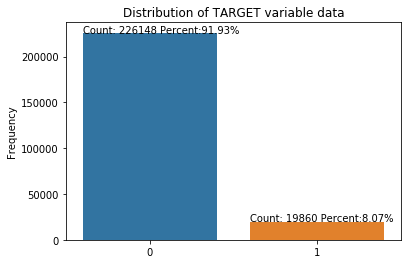

In [26]:
import seaborn as sns
# sns.countplot(data=df_kaggle_train, x='TARGET')
ax = sns.countplot(x=Y_train.ravel())
ax.set(ylabel="Frequency")
for p in ax.patches:
        ax.annotate('Count: {:.0f}'.format(p.get_height()) + ' Percent:' + '{:.2f}%'.format(p.get_height()/\
                    Y_train.shape[0] * 100), (p.get_x(), p.get_height()+50))
ax.set_title("Distribution of TARGET variable data")
plt.show()

The above figure suggests that the dataset is highly imbalanced which is very crutial information to keep in mind before building the models.

# Dimension reduction
## PCA

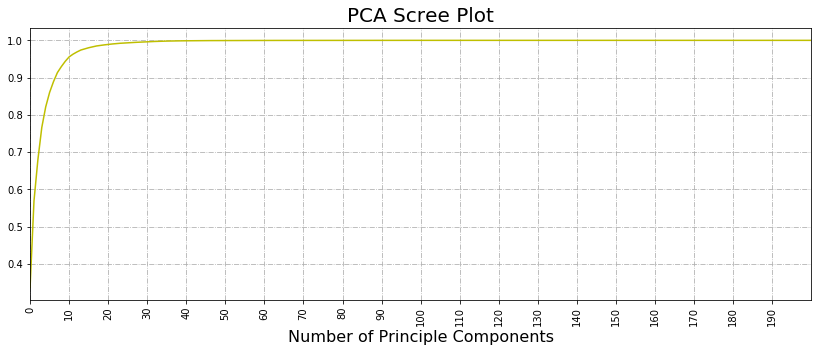

In [27]:
from sklearn.decomposition import PCA
plt.figure(figsize=(14,5))

plt.xlim((0,200))
plt.xticks(np.arange(0, 200, 10), rotation=90)
plt.xlabel('Number of Principle Components', fontsize=16)
pca=PCA()
pca.fit(X_norm_train)
plt.grid(linestyle='-.')
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'y-', label='Normalized Data');
plt.title('PCA Scree Plot', fontsize=20)
plt.show()

From above figure, we choose 8 PCA components for unscaled data, 110 PCA components for StandardScalar and 35 PCA components for both MinMaxScalar and MaxAbsScalar. This choice was made to choose number of principle components that could explain 80% of the variance in the dataset.

# Classification evaluation function

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy
import pandas as pd
import itertools

def classification_evaluation(y_actual, y_prediction, y_prediction_prob, pr_roc_ind=1):
    """
    Implementation of classification_evaluation which is for implementaion of creation of confusion matrix and 
    ROC/PR curve.
        
    Arguments:
    y_actual -- Actual values of the variable to be predicted
    y_prediction -- Predicted values of the variable to be predicted
    y_prediction_prob -- Prediction probabilities with predicted values of the variable to be predicted
    pr_roc_ind -- Indicator to determine whether to create PR curve or ROC curve. If 1 then PR curve else ROC curve.
       
    Returns:
    """
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_actual, y_prediction)
    np.set_printoptions(precision=2)
    print("Detailed classification report:\n")
    print(classification_report(y_actual, y_prediction))
    print('Accuracy:', accuracy_score(y_actual, y_prediction))
    print('Weighted F1 score:', f1_score(y_actual, y_prediction, average='weighted'))
    
    fig, ax = plt.subplots(1,2, figsize=(14, 6))
    # Plot confusion matrix
    ax[0] = plot_confusion_matrix(cnf_matrix, classes=[0,1], threshold=0.5, plt_axis=ax[0])
    ax[0].set_title('Confusion Matrix')

    if pr_roc_ind==1:
        # calculate the fpr and tpr for all thresholds of the classification
        precision, recall, threshold = precision_recall_curve(y_actual, y_prediction_prob[:,1])
        # Plot PR Curve    
        ax[1] = plot_precision_recall_curve(precision, recall, plt_axis=ax[1])
        average_precision = average_precision_score(y_actual, y_prediction)
        ax[1].set_title("PR Curve:Average precision-recall score: {0:0.2f}".format(average_precision) )
    
    else:
        # calculate the fpr and tpr for all thresholds of the classification
        fpr, tpr, threshold = roc_curve(y_actual, y_prediction_prob[:,1])
        # Plot ROC Curve    
        ax[1] = plot_roc_curve(fpr, tpr, plt_axis=ax[1])
        ax[1].set_title("ROC Curve")
    
    plt.subplots_adjust( wspace=0.2)
    plt.show()
    
def plot_confusion_matrix(cm, classes, plt_axis, 
                          threshold = 0,
                          cmap=plt.cm.Blues ):
    """
    This function prints and plots the confusion matrix.
    """
    cm1 = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.sca(plt_axis)
    plt.imshow(cm1, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' 
    thresh = cm1.max() / 4 if threshold==0 else threshold
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt_axis.text(j, i, format(cm[i, j], fmt)+'\nNormalized:' + format(cm1[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm1[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return plt_axis

def plot_roc_curve(fpr, tpr, plt_axis):
    roc_auc = auc(fpr, tpr) # Area under curve
    plt.sca(plt_axis)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.fill_between(fpr, tpr, step='post', alpha=0.2, color='b')
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    return plt_axis

def plot_precision_recall_curve(precision, recall, plt_axis):
    pr_auc = auc(recall, precision) # Area under curve
    plt.sca(plt_axis)
    plt.step(recall, precision, color='b', alpha=0.2, where='post', label = 'AUC = %0.2f' % pr_auc)
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.legend(loc = 'lower right')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    return plt_axis

In [29]:
# df_kaggle_test.to_csv()
def generate_kaggle_output(model, test_data, df_test_SK_ID, csv_file_name):
    df_test_SK_ID['TARGET']= model.predict(test_data)
    df_test_SK_ID.to_csv(index=False, path_or_buf = 'output/' + csv_file_name + '.csv')

In [30]:
pt = []
pt.append(1)
pt.append(2)
pt.append(13)
pt.append(4)
pt[0]

1

# Logestic Regression With PCA
<b>1. Input dataset (Log scaled) </b>

Accuracy of Training Data with # of PCA components : 8  is : 0.5737211797990309
Accuracy of Testing Data with # of PCA components : 8  is : 0.5725899549615466
Performance on Testing Data with # of PCA components : 8
Detailed classification report:

             precision    recall  f1-score   support

          0       0.94      0.57      0.71     56538
          1       0.10      0.57      0.18      4965

avg / total       0.87      0.57      0.67     61503

Accuracy: 0.5725899549615466
Weighted F1 score: 0.6682232140155302


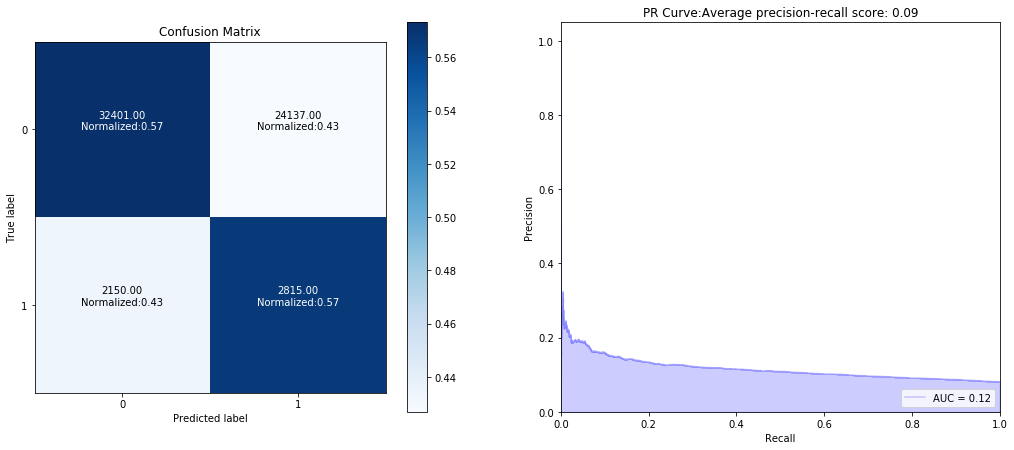

Execution time:  59.96047999999996  seconds
Accuracy of Training Data with # of PCA components : 10  is : 0.5605224220350558
Accuracy of Testing Data with # of PCA components : 10  is : 0.5585743784856023
Performance on Testing Data with # of PCA components : 10
Detailed classification report:

             precision    recall  f1-score   support

          0       0.94      0.56      0.70     56538
          1       0.10      0.59      0.18      4965

avg / total       0.87      0.56      0.66     61503

Accuracy: 0.5585743784856023
Weighted F1 score: 0.656292937077313


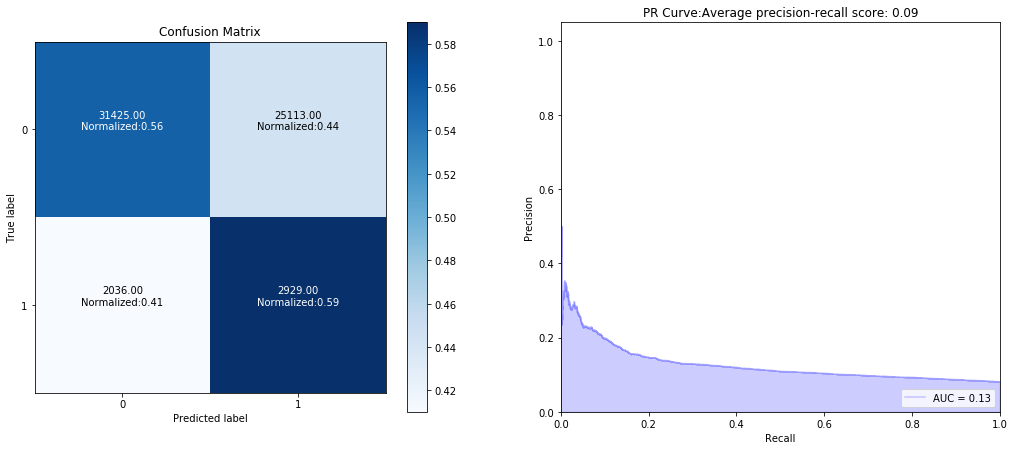

Execution time:  57.575292999999874  seconds
Accuracy of Training Data with # of PCA components : 20  is : 0.5830298201684498
Accuracy of Testing Data with # of PCA components : 20  is : 0.5799391899582135
Performance on Testing Data with # of PCA components : 20
Detailed classification report:

             precision    recall  f1-score   support

          0       0.94      0.58      0.72     56538
          1       0.11      0.60      0.19      4965

avg / total       0.87      0.58      0.67     61503

Accuracy: 0.5799391899582135
Weighted F1 score: 0.6740653989740112


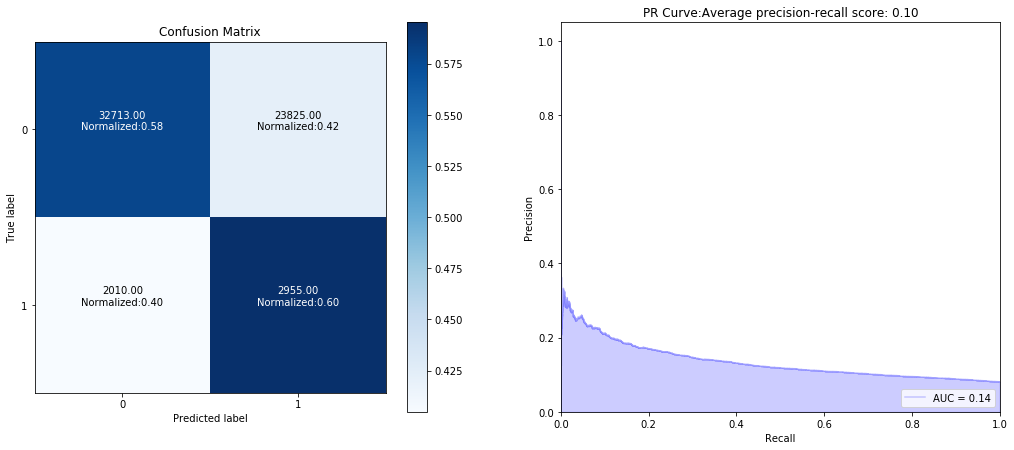

Execution time:  68.70604900000012  seconds
Accuracy of Training Data with # of PCA components : 35  is : 0.6291421417189685
Accuracy of Testing Data with # of PCA components : 35  is : 0.630180641594719
Performance on Testing Data with # of PCA components : 35
Detailed classification report:

             precision    recall  f1-score   support

          0       0.95      0.63      0.76     56538
          1       0.13      0.60      0.21      4965

avg / total       0.88      0.63      0.71     61503

Accuracy: 0.630180641594719
Weighted F1 score: 0.7143088864156435


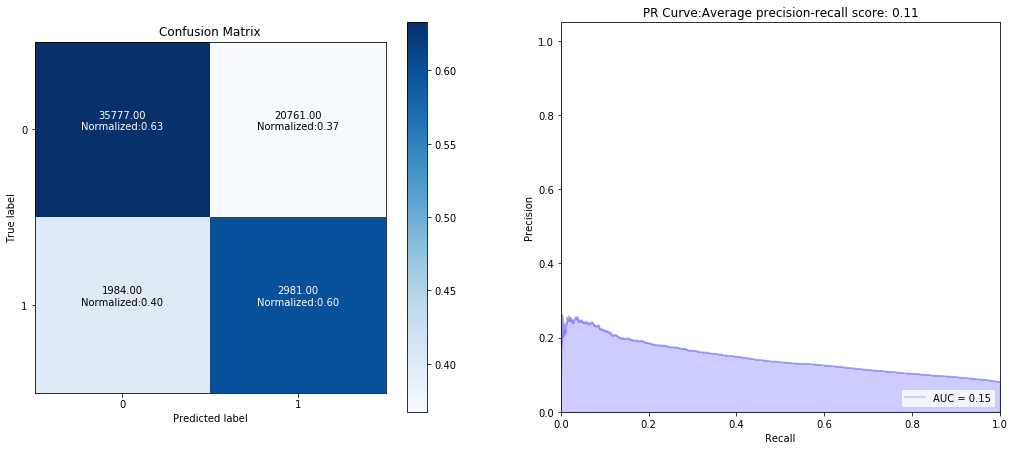

Execution time:  81.85871400000019  seconds
Accuracy of Training Data with # of PCA components : 40  is : 0.6312924782933889
Accuracy of Testing Data with # of PCA components : 40  is : 0.6321480252995789
Performance on Testing Data with # of PCA components : 40
Detailed classification report:

             precision    recall  f1-score   support

          0       0.95      0.63      0.76     56538
          1       0.13      0.60      0.21      4965

avg / total       0.88      0.63      0.72     61503

Accuracy: 0.6321480252995789
Weighted F1 score: 0.7158414660411342


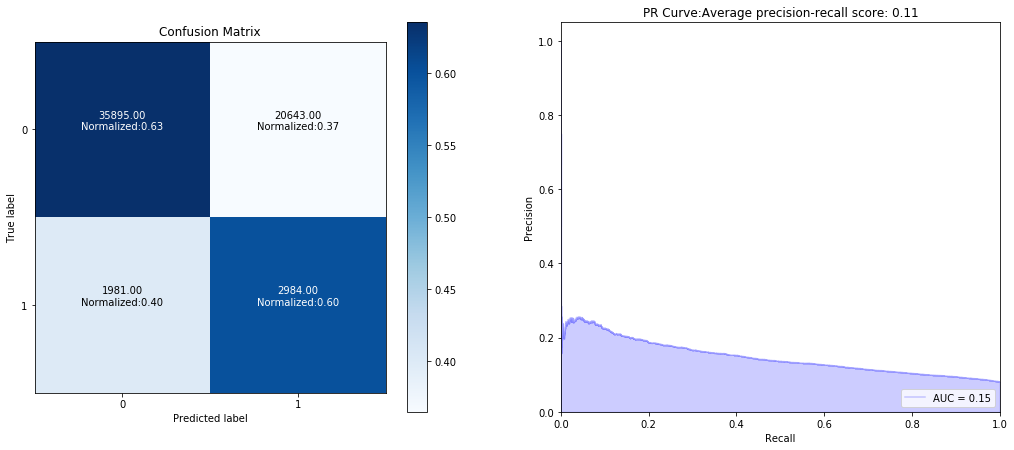

Execution time:  87.94747800000005  seconds
Accuracy of Training Data with # of PCA components : 50  is : 0.6371744008324932
Accuracy of Testing Data with # of PCA components : 50  is : 0.6374648391135391
Performance on Testing Data with # of PCA components : 50
Detailed classification report:

             precision    recall  f1-score   support

          0       0.95      0.64      0.76     56538
          1       0.13      0.61      0.21      4965

avg / total       0.88      0.64      0.72     61503

Accuracy: 0.6374648391135391
Weighted F1 score: 0.7199674749291515


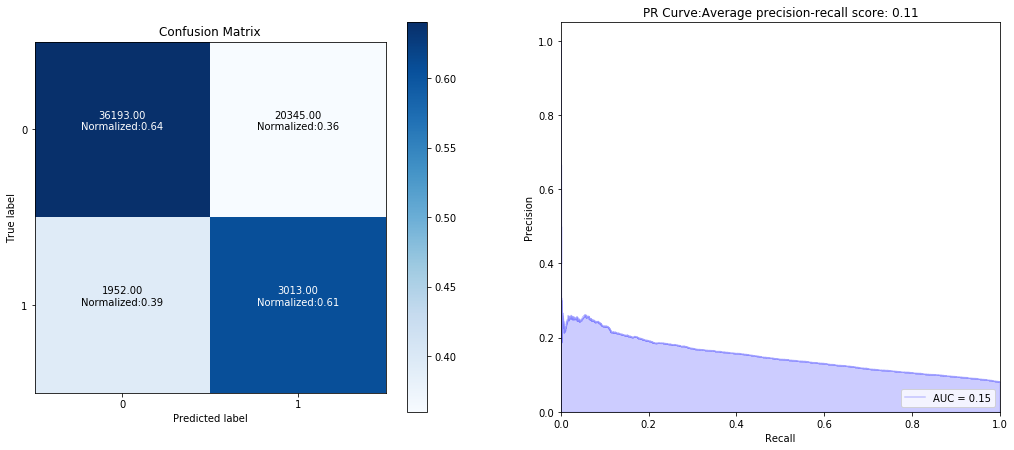

Execution time:  100.11466100000007  seconds
Accuracy of Training Data with # of PCA components : 60  is : 0.6397434229781145
Accuracy of Testing Data with # of PCA components : 60  is : 0.6400175601190186
Performance on Testing Data with # of PCA components : 60
Detailed classification report:

             precision    recall  f1-score   support

          0       0.95      0.64      0.77     56538
          1       0.13      0.61      0.22      4965

avg / total       0.88      0.64      0.72     61503

Accuracy: 0.6400175601190186
Weighted F1 score: 0.7219424425228611


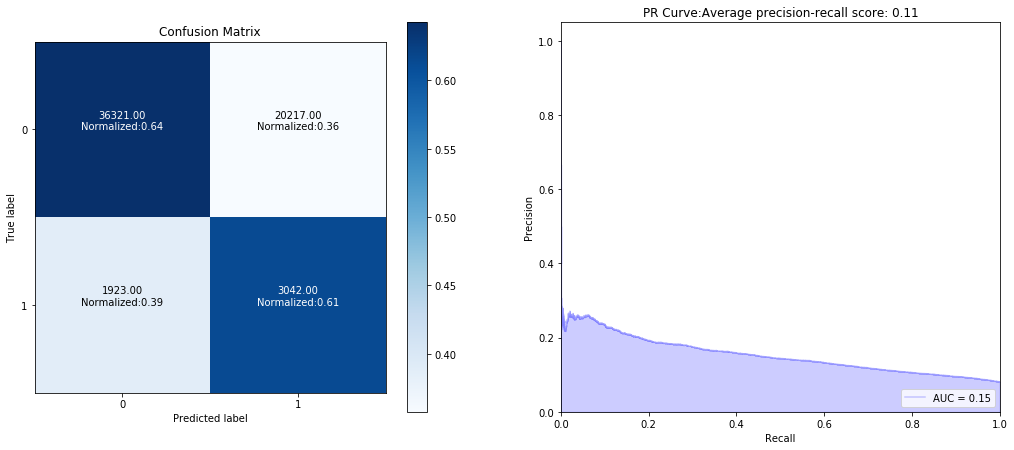

Execution time:  112.637835  seconds
Accuracy of Training Data with # of PCA components : 70  is : 0.6401783681831485
Accuracy of Testing Data with # of PCA components : 70  is : 0.640602897419638
Performance on Testing Data with # of PCA components : 70
Detailed classification report:

             precision    recall  f1-score   support

          0       0.95      0.64      0.77     56538
          1       0.13      0.61      0.22      4965

avg / total       0.88      0.64      0.72     61503

Accuracy: 0.640602897419638
Weighted F1 score: 0.7223951297311756


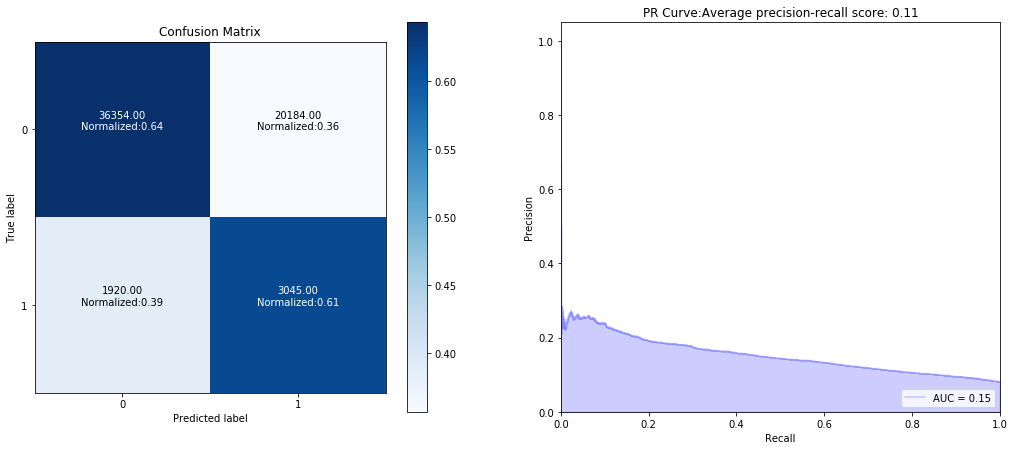

Execution time:  124.01951499999996  seconds
Accuracy of Training Data with # of PCA components : 80  is : 0.6408368833533868
Accuracy of Testing Data with # of PCA components : 80  is : 0.6421800562574184
Performance on Testing Data with # of PCA components : 80
Detailed classification report:

             precision    recall  f1-score   support

          0       0.95      0.64      0.77     56538
          1       0.13      0.61      0.22      4965

avg / total       0.88      0.64      0.72     61503

Accuracy: 0.6421800562574184
Weighted F1 score: 0.7236139075717286


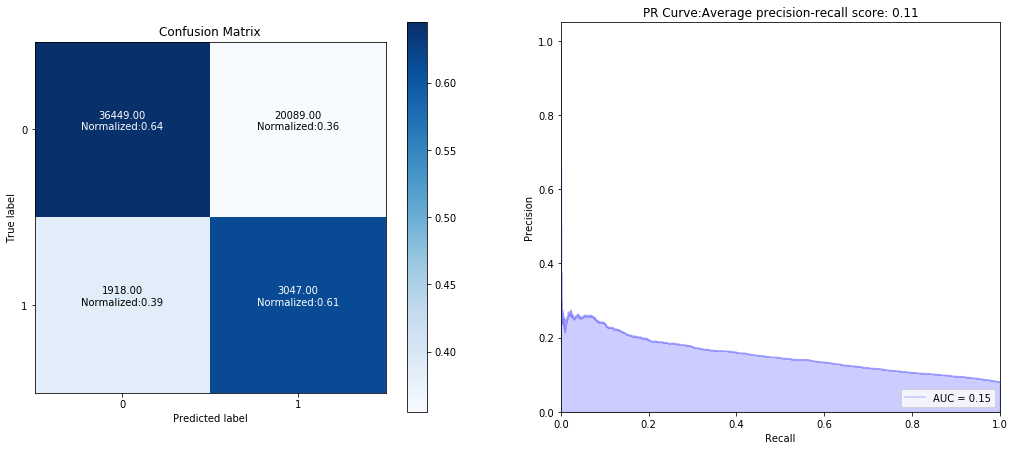

Execution time:  132.118152  seconds


In [36]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit
import time

n_comp=[8,10,20,35, 40, 50, 60, 70, 80]
pca = []
cls= []
indx = 0
for pca_comp in n_comp:
    start_time = time.clock()
    pca.append(PCA(n_components=pca_comp))
    # Logistic regression with balanced class_weight as the dataset is highly imbalanced
    cls.append(LogisticRegression(class_weight='balanced'))

    pipe = Pipeline([('pca', pca[indx]), ('logistic', cls[indx])])

    pipe.fit(X_norm_train, Y_train)
    predictions = pipe.predict(X_norm_train)
    predictions = predictions.reshape(predictions.size, 1)
    print("Accuracy of Training Data with # of PCA components :", pca_comp, " is :", 
          accuracy_score(Y_train, predictions))
    
    predictions = pipe.predict(X_norm_test)
    predictions = predictions.reshape(predictions.size, 1)
    pred_prob = pipe.predict_proba(X_norm_test)
    print("Accuracy of Testing Data with # of PCA components :", pca_comp, " is :", 
          accuracy_score(Y_test, predictions))
    print("Performance on Testing Data with # of PCA components :", pca_comp)
    classification_evaluation(Y_test, predictions, pred_prob)
    print("Execution time: ", time.clock() - start_time, " seconds")
    indx = indx +1

In [42]:
generate_kaggle_output(cls[3], pca[3].transform(X_norm_kaggle_test),
                       pd.DataFrame(df_kaggle_test.SK_ID_CURR), "new_norm_LogesticReg_PCA" )

<b>2. Normalized Input dataset</b>

# Unsupervised Neural network model
## BernoulliRBM feature extractor and a LogisticRegression classifier
Restricted Boltzmann machines (RBM) are unsupervised nonlinear feature learners based on a probabilistic model. BernoulliRBM assumes the inputs are either binary values or values between 0 and 1, each encoding the probability that the specific feature would be turned on. So here we will be using scaled dataset only. RBM tries to maximize the likelihood of the data using a particular graphical model. The parameter learning algorithm used (Stochastic Maximum Likelihood) prevents the representations from straying far from the input data, which makes them capture interesting regularities, but makes the model less useful for small datasets, and usually not useful for density estimation. Since we have a decent dataset, BernoulliRBM may be a tryworthy algorithm to implement. 

In [46]:
# Pick the best rbm model from other notebook and 
#     apply a few different classification algorithms on the features learned by RBM
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import Normalizer

# X_norm = Normalizer().fit_transform(X)
rbm_norm = BernoulliRBM(n_components=50)

Accuracy of Training Data with RBM (50 hidden nodes) is : 0.8219448148027706
Normalized Data - RBM + Logestic Regression Cross Validation Execution :  1
Detailed classification report:

             precision    recall  f1-score   support

          0       0.92      0.88      0.90     56538
          1       0.12      0.19      0.15      4965

avg / total       0.86      0.82      0.84     61503

Accuracy: 0.822545241695527
Weighted F1 score: 0.8399920019441404


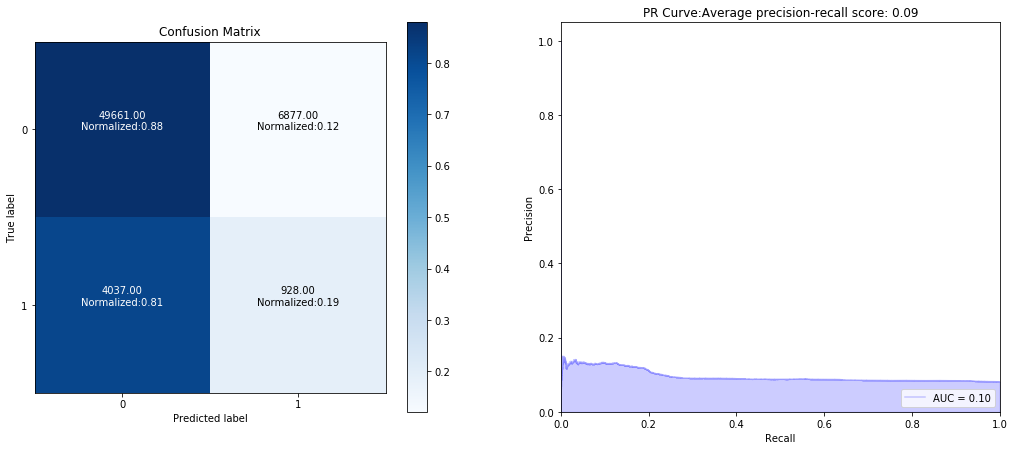

In [49]:
logistic = LogisticRegression(penalty='l2', class_weight='balanced')

logistic.fit(rbm_norm.fit_transform(X_norm_train), Y_train)
predictions = logistic.predict(rbm_norm.transform(X_norm_train))
predictions = predictions.reshape(predictions.size, 1)
print("Accuracy of Training Data with RBM (50 hidden nodes) is :", 
    accuracy_score(Y_train, predictions))
y_pred = logistic.predict(rbm_norm.transform(X_norm_test))
pred_prob = logistic.predict_proba(rbm_norm.transform(X_norm_test))
print("Normalized Data - RBM + Logestic Regression Cross Validation Execution : ", count)
classification_evaluation(Y_test, y_pred, pred_prob)

Accuracy of Training Data with RBM (100 hidden nodes) is : 0.8027950310559007
Normalized Data - RBM + Logestic Regression Cross Validation Execution :  1
Detailed classification report:

             precision    recall  f1-score   support

          0       0.93      0.85      0.89     56538
          1       0.12      0.22      0.15      4965

avg / total       0.86      0.80      0.83     61503

Accuracy: 0.8031640732972375
Weighted F1 score: 0.829175916495083


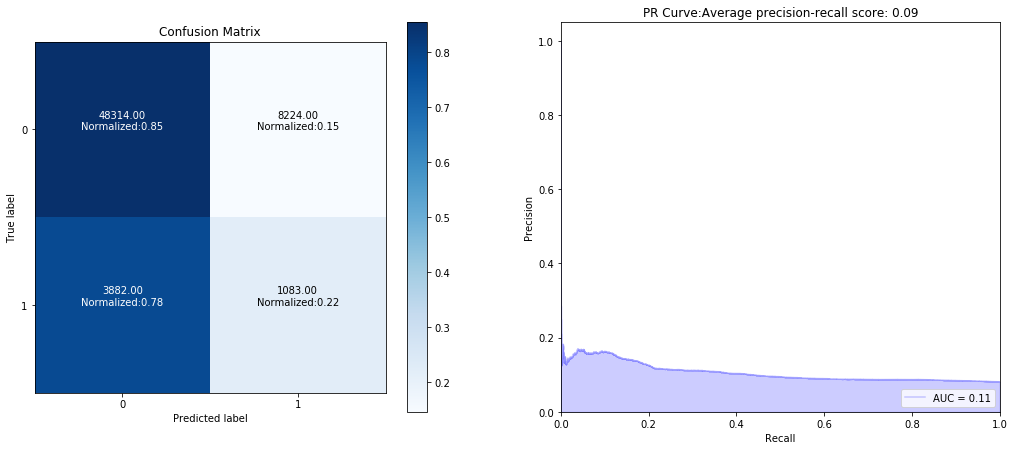

In [51]:
rbm_norm_new = BernoulliRBM(n_components=100)
logistic_new = LogisticRegression(penalty='l2', class_weight='balanced')

logistic_new.fit(rbm_norm_new.fit_transform(X_norm_train), Y_train)
predictions = logistic_new.predict(rbm_norm_new.transform(X_norm_train))
predictions = predictions.reshape(predictions.size, 1)
print("Accuracy of Training Data with RBM (100 hidden nodes) is :", 
    accuracy_score(Y_train, predictions))
y_pred = logistic_new.predict(rbm_norm_new.transform(X_norm_test))
pred_prob = logistic_new.predict_proba(rbm_norm_new.transform(X_norm_test))
print("Normalized Data - RBM + Logestic Regression Cross Validation Execution : ", count)
classification_evaluation(Y_test, y_pred, pred_prob)

Accuracy of Training Data with RBM (50 hidden nodes) is : 0.7749300835745179
Normalized Data - RBM + Logestic Regression Cross Validation Execution :  1
Detailed classification report:

             precision    recall  f1-score   support

          0       0.93      0.82      0.87     56538
          1       0.11      0.26      0.16      4965

avg / total       0.86      0.77      0.81     61503

Accuracy: 0.7740272832219567
Weighted F1 score: 0.8120166714845636


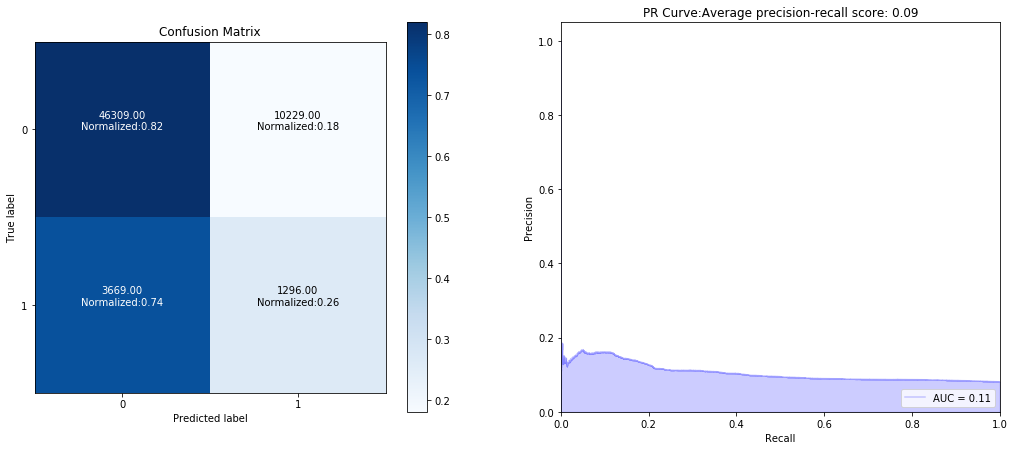

In [52]:
rbm_norm_150 = BernoulliRBM(n_components=100)
logistic_150 = LogisticRegression(penalty='l2', class_weight='balanced')

logistic_150.fit(rbm_norm_150.fit_transform(X_norm_train), Y_train)
predictions = logistic_150.predict(rbm_norm_150.transform(X_norm_train))
predictions = predictions.reshape(predictions.size, 1)
print("Accuracy of Training Data with RBM (150 hidden nodes) is :", 
    accuracy_score(Y_train, predictions))
y_pred = logistic_150.predict(rbm_norm_150.transform(X_norm_test))
pred_prob = logistic_150.predict_proba(rbm_norm_150.transform(X_norm_test))
print("Normalized Data - RBM + Logestic Regression Cross Validation Execution : ", count)
classification_evaluation(Y_test, y_pred, pred_prob)

In [54]:
generate_kaggle_output(logistic_150, rbm_norm_150.transform(X_norm_kaggle_test),
                       pd.DataFrame(df_kaggle_test.SK_ID_CURR), "new_LogesticReg_RBM_150" )                        

Accuracy of Training Data with # of PCA components : 35  is : 0.6304754316932782
Accuracy of Testing Data with # of PCA components : 35  is : 0.6318390972798075
Performance on Testing Data with # of PCA components : 35
Detailed classification report:

             precision    recall  f1-score   support

          0       0.95      0.63      0.76     56538
          1       0.13      0.60      0.21      4965

avg / total       0.88      0.63      0.72     61503

Accuracy: 0.6318390972798075
Weighted F1 score: 0.7156019247116706


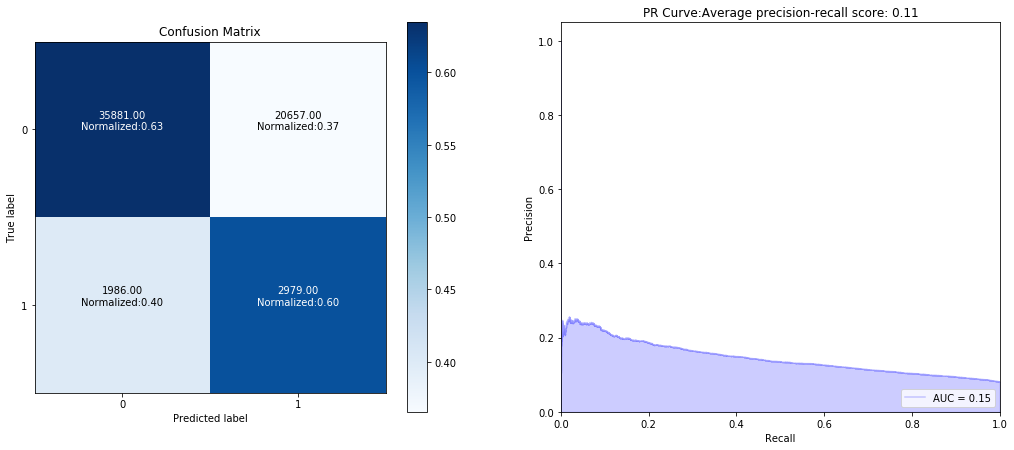

Execution time:  89.38026100000025  seconds


In [56]:
n_comp=[35]
for pca_comp in n_comp:
    start_time = time.clock()
    pca.append(PCA(n_components=pca_comp))
    # Logistic regression with balanced class_weight as the dataset is highly imbalanced
    cls.append(LogisticRegression(class_weight='balanced', penalty='l1'))

    pipe = Pipeline([('pca', pca[indx]), ('logistic', cls[indx])])

    pipe.fit(X_norm_train, Y_train)
    predictions = pipe.predict(X_norm_train)
    predictions = predictions.reshape(predictions.size, 1)
    print("Accuracy of Training Data with # of PCA components :", pca_comp, " is :", 
          accuracy_score(Y_train, predictions))
    
    predictions = pipe.predict(X_norm_test)
    predictions = predictions.reshape(predictions.size, 1)
    pred_prob = pipe.predict_proba(X_norm_test)
    print("Accuracy of Testing Data with # of PCA components :", pca_comp, " is :", 
          accuracy_score(Y_test, predictions))
    print("Performance on Testing Data with # of PCA components :", pca_comp)
    classification_evaluation(Y_test, predictions, pred_prob)
    print("Execution time: ", time.clock() - start_time, " seconds")
    indx = indx +1

Accuracy of Training Data with # of PCA components : 35  is : 0.6307721700107314
Accuracy of Testing Data with # of PCA components : 35  is : 0.6319854316049623
Performance on Testing Data with # of PCA components : 35
Detailed classification report:

             precision    recall  f1-score   support

          0       0.95      0.63      0.76     56538
          1       0.13      0.60      0.21      4965

avg / total       0.88      0.63      0.72     61503

Accuracy: 0.6319854316049623
Weighted F1 score: 0.7157160633060382


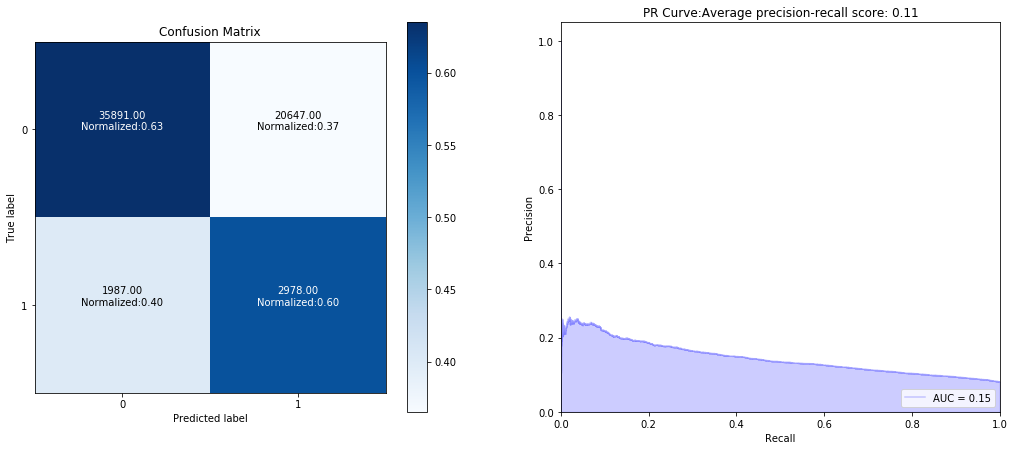

Execution time:  86.21662000000106  seconds


In [57]:
n_comp=[35]
for pca_comp in n_comp:
    start_time = time.clock()
    pca.append(PCA(n_components=pca_comp))
    # Logistic regression with balanced class_weight as the dataset is highly imbalanced
    cls.append(LogisticRegression(class_weight='balanced', penalty='l2', C=1000))

    pipe = Pipeline([('pca', pca[indx]), ('logistic', cls[indx])])

    pipe.fit(X_norm_train, Y_train)
    predictions = pipe.predict(X_norm_train)
    predictions = predictions.reshape(predictions.size, 1)
    print("Accuracy of Training Data with # of PCA components :", pca_comp, " is :", 
          accuracy_score(Y_train, predictions))
    
    predictions = pipe.predict(X_norm_test)
    predictions = predictions.reshape(predictions.size, 1)
    pred_prob = pipe.predict_proba(X_norm_test)
    print("Accuracy of Testing Data with # of PCA components :", pca_comp, " is :", 
          accuracy_score(Y_test, predictions))
    print("Performance on Testing Data with # of PCA components :", pca_comp)
    classification_evaluation(Y_test, predictions, pred_prob)
    print("Execution time: ", time.clock() - start_time, " seconds")
    indx = indx +1

Accuracy of Training Data with # of PCA components : 35  is : 0.6190286494748138
Accuracy of Testing Data with # of PCA components : 35  is : 0.6174332959367835
Performance on Testing Data with # of PCA components : 35
Detailed classification report:

             precision    recall  f1-score   support

          0       0.93      0.63      0.75     56538
          1       0.11      0.50      0.17      4965

avg / total       0.87      0.62      0.70     61503

Accuracy: 0.6174332959367835
Weighted F1 score: 0.704482432759572


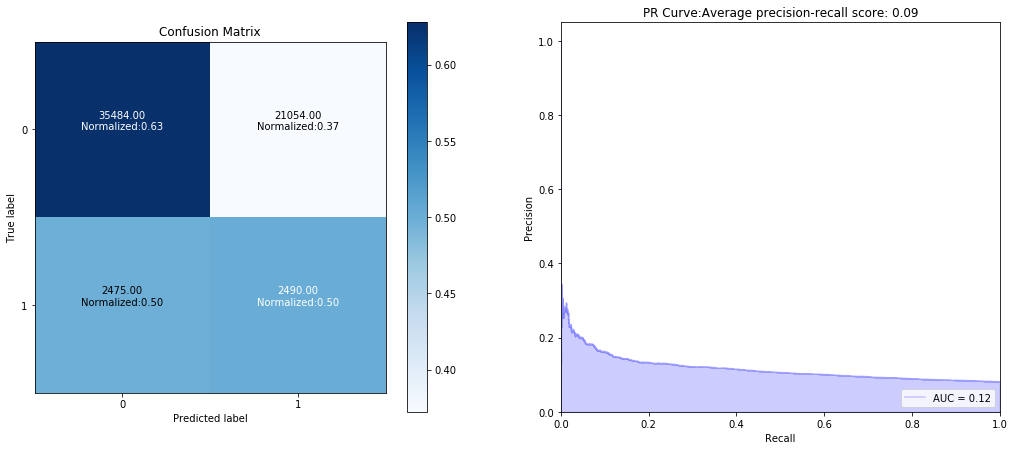

Execution time:  80.26038000000153  seconds


In [58]:
n_comp=[35]
for pca_comp in n_comp:
    start_time = time.clock()
    pca.append(PCA(n_components=pca_comp))
    # Logistic regression with balanced class_weight as the dataset is highly imbalanced
    cls.append(LogisticRegression(class_weight='balanced', penalty='l2', C=0.0001))

    pipe = Pipeline([('pca', pca[indx]), ('logistic', cls[indx])])

    pipe.fit(X_norm_train, Y_train)
    predictions = pipe.predict(X_norm_train)
    predictions = predictions.reshape(predictions.size, 1)
    print("Accuracy of Training Data with # of PCA components :", pca_comp, " is :", 
          accuracy_score(Y_train, predictions))
    
    predictions = pipe.predict(X_norm_test)
    predictions = predictions.reshape(predictions.size, 1)
    pred_prob = pipe.predict_proba(X_norm_test)
    print("Accuracy of Testing Data with # of PCA components :", pca_comp, " is :", 
          accuracy_score(Y_test, predictions))
    print("Performance on Testing Data with # of PCA components :", pca_comp)
    classification_evaluation(Y_test, predictions, pred_prob)
    print("Execution time: ", time.clock() - start_time, " seconds")
    indx = indx +1

Accuracy of Training Data with # of PCA components : 35  is : 0.6288982472114728
Accuracy of Testing Data with # of PCA components : 35  is : 0.6306846820480302
Performance on Testing Data with # of PCA components : 35
Detailed classification report:

             precision    recall  f1-score   support

          0       0.95      0.63      0.76     56538
          1       0.13      0.60      0.21      4965

avg / total       0.88      0.63      0.71     61503

Accuracy: 0.6306846820480302
Weighted F1 score: 0.7147012783794195


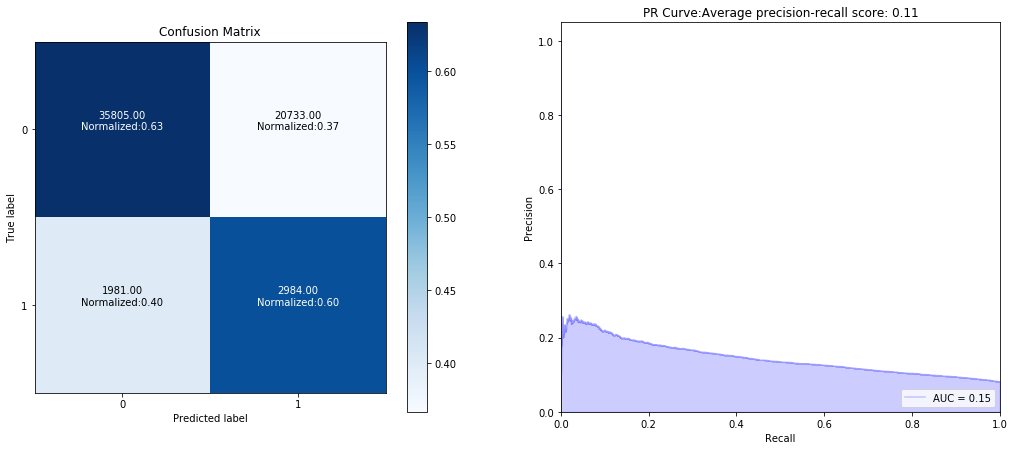

Execution time:  81.18666200000007  seconds


In [59]:
n_comp=[35]
for pca_comp in n_comp:
    start_time = time.clock()
    pca.append(PCA(n_components=pca_comp))
    # Logistic regression with balanced class_weight as the dataset is highly imbalanced
    cls.append(LogisticRegression(class_weight='balanced', penalty='l2', tol=1))

    pipe = Pipeline([('pca', pca[indx]), ('logistic', cls[indx])])

    pipe.fit(X_norm_train, Y_train)
    predictions = pipe.predict(X_norm_train)
    predictions = predictions.reshape(predictions.size, 1)
    print("Accuracy of Training Data with # of PCA components :", pca_comp, " is :", 
          accuracy_score(Y_train, predictions))
    
    predictions = pipe.predict(X_norm_test)
    predictions = predictions.reshape(predictions.size, 1)
    pred_prob = pipe.predict_proba(X_norm_test)
    print("Accuracy of Testing Data with # of PCA components :", pca_comp, " is :", 
          accuracy_score(Y_test, predictions))
    print("Performance on Testing Data with # of PCA components :", pca_comp)
    classification_evaluation(Y_test, predictions, pred_prob)
    print("Execution time: ", time.clock() - start_time, " seconds")
    indx = indx +1

Accuracy of Training Data with # of PCA components : 35  is : 0.6291462066274267
Accuracy of Testing Data with # of PCA components : 35  is : 0.630180641594719
Performance on Testing Data with # of PCA components : 35
Detailed classification report:

             precision    recall  f1-score   support

          0       0.95      0.63      0.76     56538
          1       0.13      0.60      0.21      4965

avg / total       0.88      0.63      0.71     61503

Accuracy: 0.630180641594719
Weighted F1 score: 0.7143088864156435


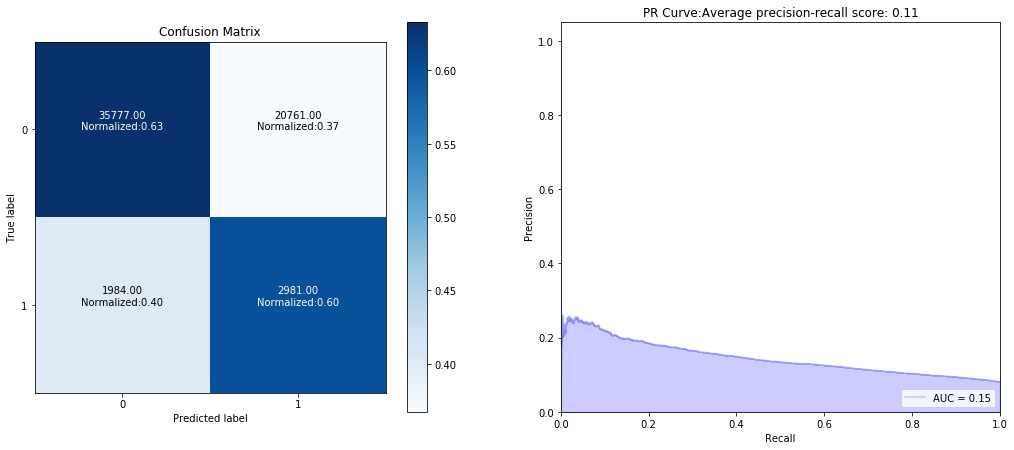

Execution time:  89.01452499999868  seconds


In [60]:
n_comp=[35]
for pca_comp in n_comp:
    start_time = time.clock()
    pca.append(PCA(n_components=pca_comp))
    # Logistic regression with balanced class_weight as the dataset is highly imbalanced
    cls.append(LogisticRegression(class_weight='balanced', penalty='l2', tol=0.000001))

    pipe = Pipeline([('pca', pca[indx]), ('logistic', cls[indx])])

    pipe.fit(X_norm_train, Y_train)
    predictions = pipe.predict(X_norm_train)
    predictions = predictions.reshape(predictions.size, 1)
    print("Accuracy of Training Data with # of PCA components :", pca_comp, " is :", 
          accuracy_score(Y_train, predictions))
    
    predictions = pipe.predict(X_norm_test)
    predictions = predictions.reshape(predictions.size, 1)
    pred_prob = pipe.predict_proba(X_norm_test)
    print("Accuracy of Testing Data with # of PCA components :", pca_comp, " is :", 
          accuracy_score(Y_test, predictions))
    print("Performance on Testing Data with # of PCA components :", pca_comp)
    classification_evaluation(Y_test, predictions, pred_prob)
    print("Execution time: ", time.clock() - start_time, " seconds")
    indx = indx +1

In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=20, step=1)
rfe.fit(X_norm_train, Y_train)
ranking = rfe.ranking_.reshape(digits.images[0].shape)

# Plot pixel ranking
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()

In [77]:
def feature_imp_plot(model, model_name, title, features):
    x, y = (list(x) for x in zip(*sorted(zip(model.feature_importances_, features), 
                                                            reverse = False)))
    importances = model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
    indices = np.argsort(importances)[::-1]
    tot = 0
    plt.figure()
    plt.title(title)
    
    plt.bar(range(np.shape(x)[0]), importances[indices],
       color="r", yerr=std[indices], align="center")
    plt.xticks(range(np.shape(x)[0]), indices)
    plt.xlim([-1, np.shape(x)[0]])
    plt.show()

Log sampled Data - Random Forest Execution : 
Detailed classification report:

             precision    recall  f1-score   support

          0       0.92      1.00      0.96     56538
          1       0.30      0.01      0.02      4965

avg / total       0.87      0.92      0.88     61503

Accuracy: 0.9181340747605807
Weighted F1 score: 0.881696994351818


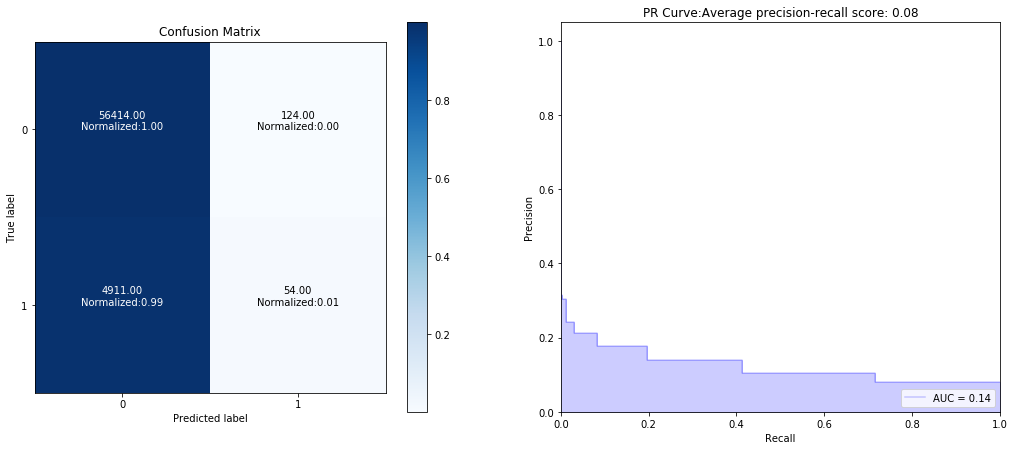

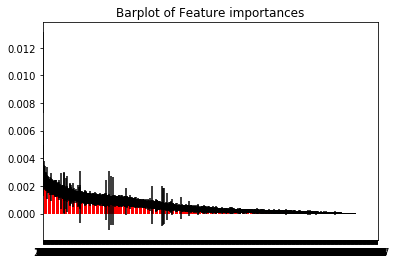

In [78]:
from sklearn.ensemble import RandomForestClassifier

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
count = 1
print("")
for train_index, test_index in sss.split(X_norm, Y):
    X_train = X_norm[train_index]
    Y_train = Y[train_index]
    X_test = X_norm[test_index]
    Y_test = Y[test_index]
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train.ravel())
y_pred = rfc.predict(X_test)
pred_prob = rfc.predict_proba(X_test)
print("Log sampled Data - Random Forest Execution : ")
classification_evaluation(Y_test, y_pred, pred_prob)
feature_imp_plot(rfc, 'Random Forest Feature importance', 'Barplot of Feature importances', 
                 features)
generate_kaggle_output(rfc, X_test_kaggle_norm,
                       pd.DataFrame(df_kaggle_test.SK_ID_CURR), "randomForest_norm" )


***
### LightGBM, Light Gradient Boosting Machine
A gradient boosting framework that uses tree based learning algorithms. Experimental study on public datasets show that LightGBM can outperform existing boosting frameworks on both efficiency and accuracy, with significantly lower memory consumption. 

In [79]:
from lightgbm import LGBMClassifier

# Display/plot feature importance
def display_importances(feature_importance_df_):
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", 
                            ascending=False)[:40].index  # Select top 40 features
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    plt.figure(figsize=(8, 10))
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.show()


Training until validation scores don't improve for 200 rounds.
[100]	valid_0's auc: 0.766783	valid_1's auc: 0.757022
[200]	valid_0's auc: 0.788987	valid_1's auc: 0.769512
[300]	valid_0's auc: 0.802436	valid_1's auc: 0.774555
[400]	valid_0's auc: 0.812735	valid_1's auc: 0.777255
[500]	valid_0's auc: 0.821247	valid_1's auc: 0.778917
[600]	valid_0's auc: 0.828598	valid_1's auc: 0.780008
[700]	valid_0's auc: 0.835026	valid_1's auc: 0.780674
[800]	valid_0's auc: 0.840976	valid_1's auc: 0.780777
[900]	valid_0's auc: 0.846726	valid_1's auc: 0.780986
[1000]	valid_0's auc: 0.852362	valid_1's auc: 0.781196
[1100]	valid_0's auc: 0.85743	valid_1's auc: 0.781134
[1200]	valid_0's auc: 0.862092	valid_1's auc: 0.781
Early stopping, best iteration is:
[1070]	valid_0's auc: 0.855748	valid_1's auc: 0.781228


/home/hnsanadhya_08/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Detailed classification report:

             precision    recall  f1-score   support

          0       0.92      1.00      0.96     56538
          1       0.53      0.04      0.07      4965

avg / total       0.89      0.92      0.89     61503

Accuracy: 0.9196461961205145
Weighted F1 score: 0.886073088713986


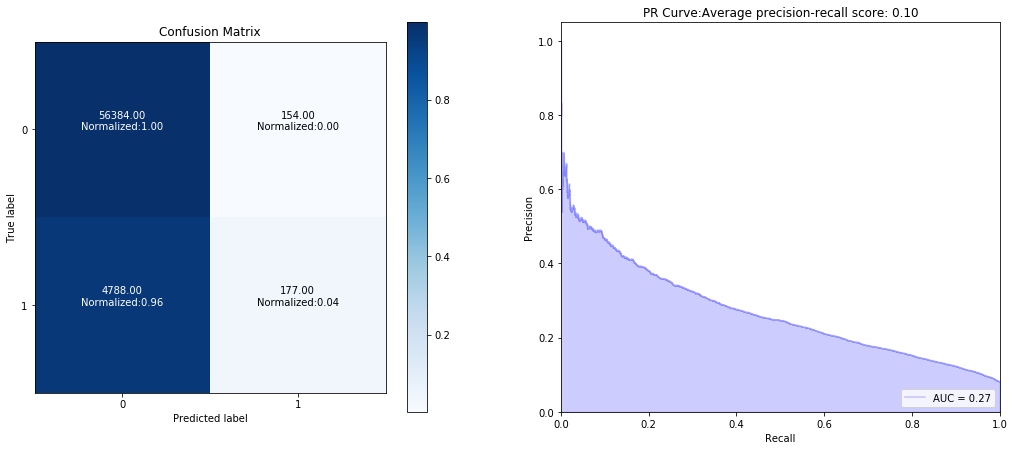

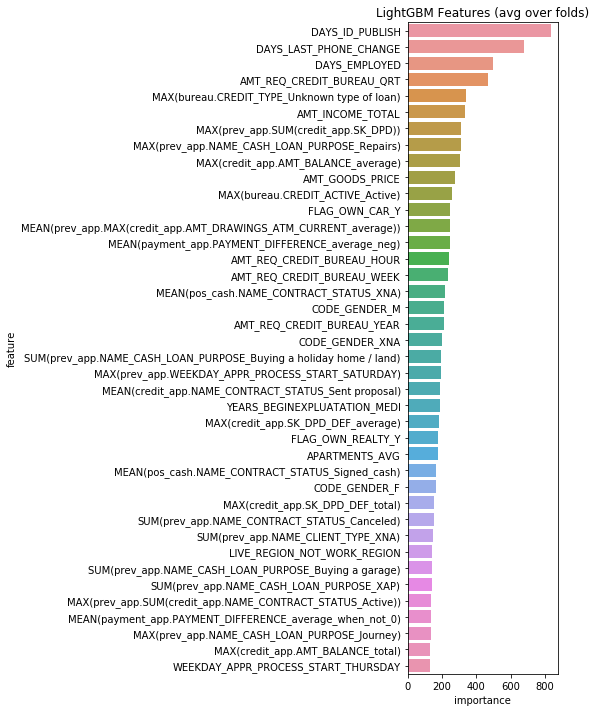

/home/hnsanadhya_08/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [80]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
count = 1
print("")
for train_index, test_index in sss.split(X_norm, Y):
    train_x = X_norm[train_index]
    train_y = Y[train_index].ravel()
    test_x = X_norm[test_index]
    test_y = Y[test_index].ravel()
    
    # LightGBM parameters 
    clf = LGBMClassifier(
        nthread=4,
        boosting_type = 'goss',
        n_estimators=10000,
        learning_rate=0.02,
        num_leaves=34,
        colsample_bytree=0.9497036,
        subsample=0.8715623,
        max_depth=8,
        reg_alpha=0.041545473,
        reg_lambda=0.0735294,
        min_split_gain=0.0222415,
        min_child_weight=39.3259775,
        silent=-1,
        verbose=-1, )

    clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (test_x, test_y)], 
        eval_metric= 'auc', verbose= 100, early_stopping_rounds= 200)

    pred_prob = clf.predict_proba(test_x)
    predictions = clf.predict(test_x)
    

    feature_importance_df = pd.DataFrame()
    feature_importance_df["feature"] = np.setdiff1d(features, ['TARGET', 'SK_ID_CURR'])
    feature_importance_df["importance"] = clf.feature_importances_
    classification_evaluation(test_y, predictions, pred_prob)
    
    display_importances(feature_importance_df)
    
generate_kaggle_output(clf, X_test_kaggle_norm,
                       pd.DataFrame(df_kaggle_test.SK_ID_CURR), "LGBM_norm" )